# Lagrange Model for Total Eenergy

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load dataset
# add a new column 'Bird(m/s)'*'Blade(rad/s)' as BirdxBlade
data_raw = pd.read_csv('LagrangeJournalBirdStrikeValueupto50.csv') 
data_raw['BirdxBlade'] = data_raw['Bird(m/s)'] * data_raw['Blade(rad/s)'] 
data_raw['Bird^2'] = data_raw['Bird(m/s)'] ** 2
data_raw['Blade^2'] = data_raw['Blade(rad/s)'] ** 2

In [3]:
data_raw.describe()

,test_set,Bird(m/s),Blade(rad/s),Max_TD(mm),Von_Mises_Stress(pascal),Total_Energy,BirdxBlade,Bird^2,Blade^2
count,49.00000,49.000000,49.000000,49.000000,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000
mean,25.00000,182.500000,515.000000,0.670000,1.167274e+09,1.821396e+06,96487.500000,34556.250000,270225.000000
std,14.28869,35.721725,71.443451,0.188392,4.449917e+07,5.044295e+05,31516.098317,13087.211225,73725.175907
min,1.00000,122.500000,395.000000,0.350000,1.059400e+09,1.037200e+06,48387.500000,15006.250000,156025.000000
25%,13.00000,152.500000,455.000000,0.490000,1.151850e+09,1.390000e+06,69387.500000,23256.250000,207025.000000
50%,25.00000,182.500000,515.000000,0.740000,1.172436e+09,1.787100e+06,93987.500000,33306.250000,265225.000000
75%,37.00000,212.500000,575.000000,0.830000,1.195846e+09,2.234322e+06,122187.500000,45156.250000,330625.000000
max,49.00000,242.500000,635.000000,0.950000,1.276456e+09,2.731651e+06,153987.500000,58806.250000,403225.000000


# Colinearity test

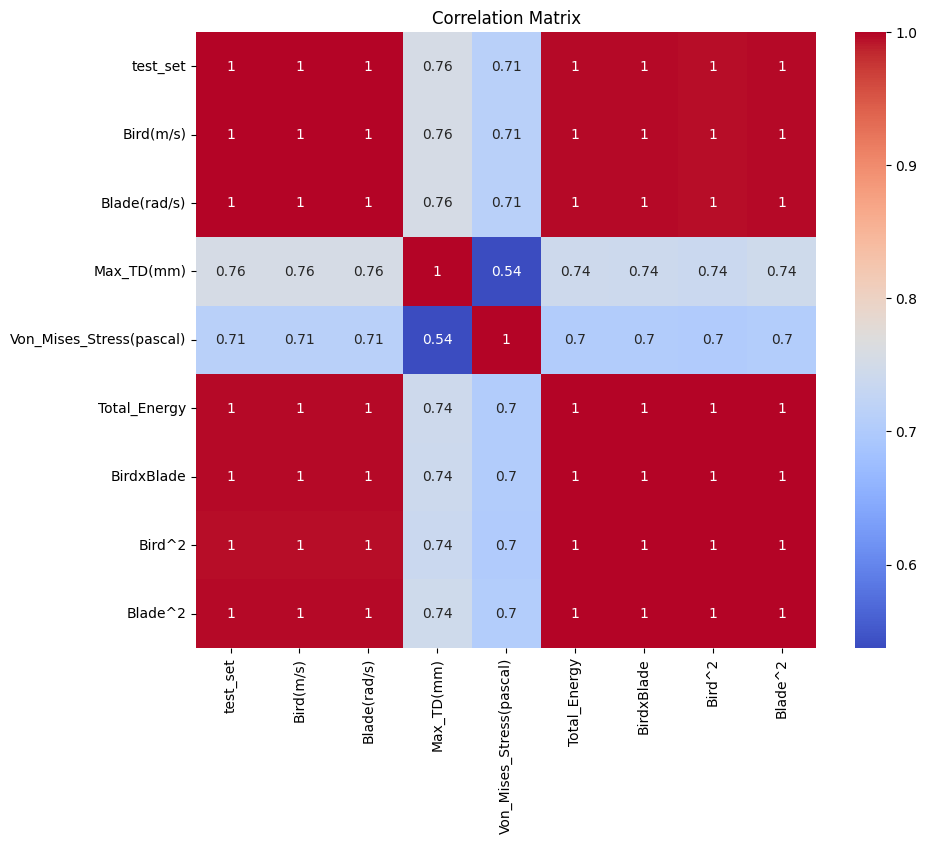

In [4]:
# Plot the correlation matrix
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = data_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot outputs for Total_Energy

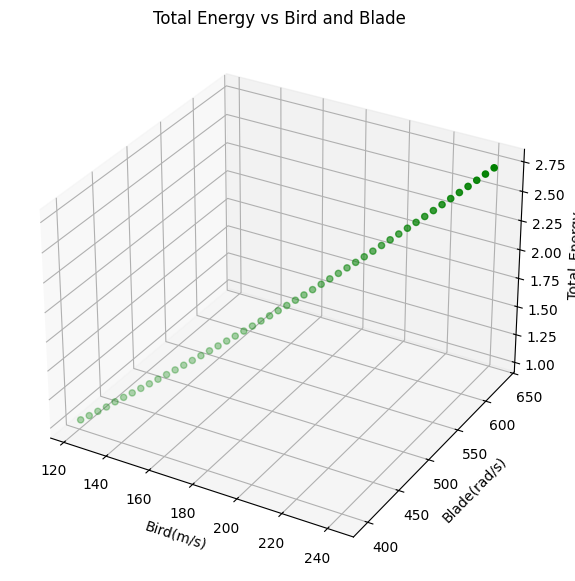

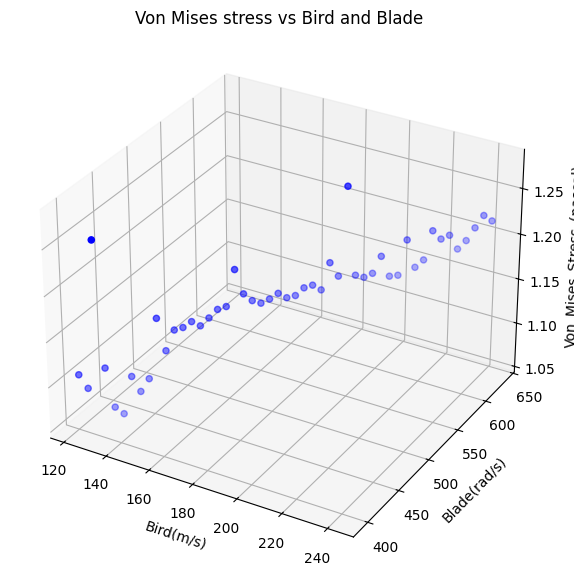

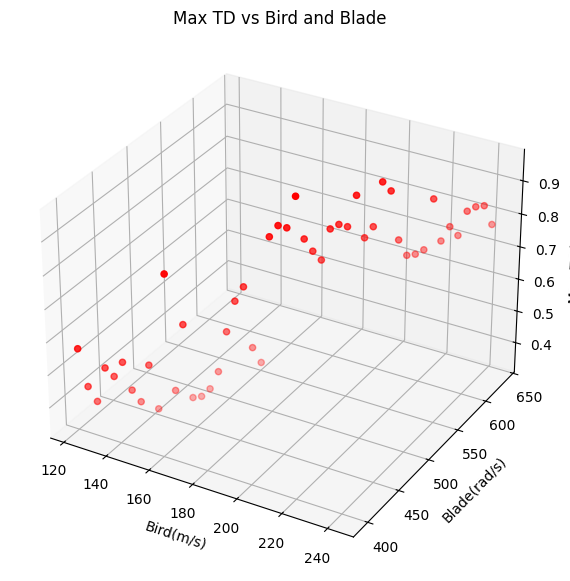

In [5]:
# plot Total Energy vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Total_Energy'], c='g', marker='o')
ax.set_title('Total Energy vs Bird and Blade')
ax.set_xlabel('Bird(m/s)')
ax.set_ylabel('Blade(rad/s)')
ax.set_zlabel('Total_Energy')
plt.show()

# plot Von Mises Stress vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Von_Mises_Stress(pascal)'], c='b', marker='o')
ax.set_title('Von Mises stress vs Bird and Blade')
ax.set_xlabel('Bird(m/s)')
ax.set_ylabel('Blade(rad/s)')
ax.set_zlabel('Von_Mises_Stress_(pascal)')
plt.show()

# plot Max TD vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Max_TD(mm)'], c='r', marker='o')
ax.set_title('Max TD vs Bird and Blade')
ax.set_xlabel('Bird(m/s)')
ax.set_ylabel('Blade(rad/s)')
ax.set_zlabel('Max_TD(mm)')
plt.show()

In [6]:
data_raw.head()

,test_set,Bird(m/s),Blade(rad/s),Max_TD(mm),Von_Mises_Stress(pascal),Total_Energy,BirdxBlade,Bird^2,Blade^2
0,1,122.5,395,0.57,1110120000,1037200.0,48387.5,15006.25,156025
1,2,125.0,400,0.45,1093550000,1063600.0,50000.0,15625.00,160000
2,3,127.5,405,0.40,1254070000,1090700.0,51637.5,16256.25,164025
3,4,130.0,410,0.50,1113520000,1118300.0,53300.0,16900.00,168100
4,5,132.5,415,0.47,1068260000,1153200.0,54987.5,17556.25,172225


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# X = data_raw[['Bird(m/s)', 'Blade(rad/s)','BirdxBlade','Bird^2','Blade^2']]
# y = pd.DataFrame({
#     'Max_TD_mm': data_raw['Max_TD(mm)'],
#     'Von_Mises_Stress_MPa': data_raw['Von_Mises_Stress(pascal)'] / 1e6,
#     'Total_Energy_kJ': data_raw['Total_Energy'] / 1000
# }) # Convert to kJ

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# rf_model = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
# )

# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Random Forest Regression Results:")
# print(f"RMSE : {rmse:.4f}")
# print(f"R²   : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")

# print ("\n k mean cross validation \n")

# # Do K mean cross validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rmse_list = []
# for train_index, test_index in kf.split(X):
#     X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#     y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
#     rf_model_kf = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
#     )
    
#     rf_model_kf.fit(X_train_kf, y_train_kf)
#     y_pred_kf = rf_model_kf.predict(X_test_kf)
    
#     mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
#     r2_kf = r2_score(y_test_kf, y_pred_kf)
#     rmse_kf = np.sqrt(mse_kf)
#     rmse_list.append(rmse_kf)
# average_rmse = np.mean(rmse_list)
# print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
# print(f"RMSEs from each fold: {rmse_list}")
# print(f"R²   : {r2_kf:.4f}")
# print(f"MSE  : {mse_kf:.4f}")

# # At fold 4 :
# # likely at very high or very low speeds the model finds harder to predict.

# # Feature imporatnace in number format
# importances = rf_model_kf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(feature_importance_df)



# 1. Random Forest Regressor (RF)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

X = data_raw[['Bird(m/s)', 'Blade(rad/s)','BirdxBlade','Bird^2','Blade^2']]
y = pd.DataFrame({
    'Max_TD_mm': data_raw['Max_TD(mm)'],
    'Von_Mises_Stress_MPa': data_raw['Von_Mises_Stress(pascal)'] / 1e6,
    'Total_Energy_kJ': data_raw['Total_Energy'] / 1000
})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

targets = y.columns
rf_models = {}
y_preds = {}
rmses = {}
r2s = {}

for target in targets:
    rf = RandomForestRegressor(
        n_estimators=25,
        random_state=42,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        n_jobs=-1,
        max_features='sqrt'
    )
    rf.fit(X_train, y_train[target])
    y_pred = rf.predict(X_test)
    rf_models[target] = rf
    y_preds[target] = y_pred
    rmses[target] = np.sqrt(mean_squared_error(y_test[target], y_pred))
    r2s[target] = r2_score(y_test[target], y_pred)
    mse = mean_squared_error(y_test[target], y_pred)
    print(f"{target}: RMSE={rmses[target]:.4f}, R²={r2s[target]:.4f}, MSE={mse:.4f}")

    # k fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_rmses = []
    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y[target].iloc[train_index], y[target].iloc[val_index]
        rf.fit(X_train_cv, y_train_cv)
        y_val_pred = rf.predict(X_val_cv)
        cv_rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_rmses.append(cv_rmse)
        r2_cv = r2_score(y_val_cv, y_val_pred)
        mse_cv = mean_squared_error(y_val_cv, y_val_pred)
    print(f"{target}: CV RMSE={np.mean(cv_rmses):.4f} ± {np.std(cv_rmses):.4f}")
    print(f"{target}: CV R²={r2_cv:.4f}, CV MSE={mse_cv:.4f}")


Max_TD_mm: RMSE=0.0749, R²=0.7703, MSE=0.0056
Max_TD_mm: CV RMSE=0.0953 ± 0.0228
Max_TD_mm: CV R²=0.6438, CV MSE=0.0097
Von_Mises_Stress_MPa: RMSE=30.8756, R²=0.2359, MSE=953.3002
Von_Mises_Stress_MPa: CV RMSE=31.2840 ± 11.6651
Von_Mises_Stress_MPa: CV R²=0.7986, CV MSE=327.5583
Total_Energy_kJ: RMSE=47.5392, R²=0.9881, MSE=2259.9779
Total_Energy_kJ: CV RMSE=40.4930 ± 4.9099
Total_Energy_kJ: CV R²=0.9915, CV MSE=1926.8229


In [12]:
# y.predict across the entire grid
bird_range = np.linspace(data_raw['Bird(m/s)'].min(), data_raw['Bird(m/s)'].max(), 50)
blade_range = np.linspace(data_raw['Blade(rad/s)'].min(), data_raw['Blade(rad/s)'].max(), 50)
BIRD, BLADE = np.meshgrid(bird_range, blade_range)
grid_df = pd.DataFrame({
    'Bird(m/s)': BIRD.ravel(),
    'Blade(rad/s)': BLADE.ravel(),
})
grid_df['BirdxBlade'] = grid_df['Bird(m/s)'] * grid_df['Blade(rad/s)']
grid_df['Bird^2'] = grid_df['Bird(m/s)'] ** 2
grid_df['Blade^2'] = grid_df['Blade(rad/s)'] ** 2
Z_pred_all = np.column_stack([
    rf_models[target].predict(grid_df) for target in targets
])
Z_pred_total = Z_pred_all[:, 2].reshape(BIRD.shape)
Z_pred_stress = Z_pred_all[:, 1].reshape(BIRD.shape)
Z_pred_td = Z_pred_all[:, 0].reshape(BIRD.shape)

print(f"Actual Von_Mises_Stress(pascal) Max: {data_raw['Von_Mises_Stress(pascal)'].max()}")
print(f"Predicted Von_Mises_Stress(pascal) Max: {Z_pred_stress.max()}")  # Convert back to pascal

Actual Von_Mises_Stress(pascal) Max: 1276456097
Predicted Von_Mises_Stress(pascal) Max: 1213.6516124019045


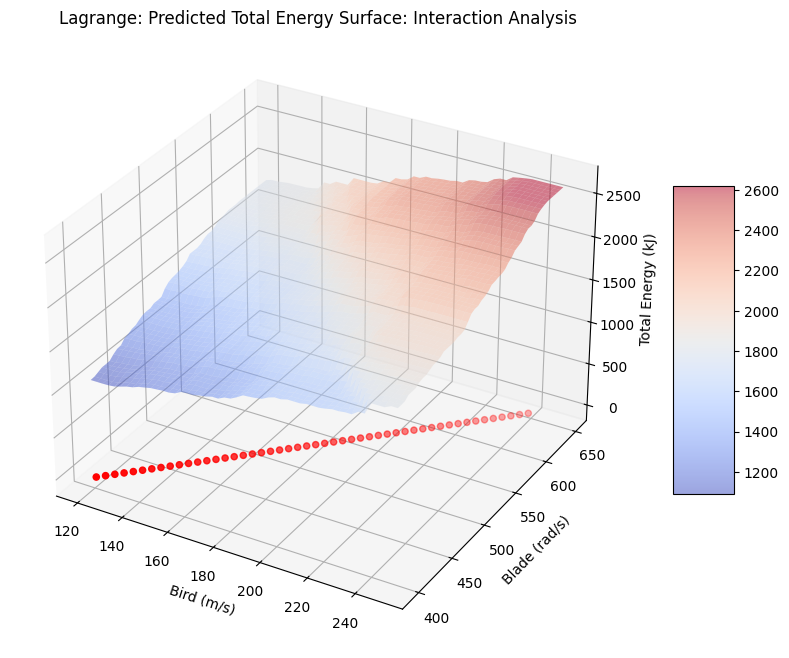

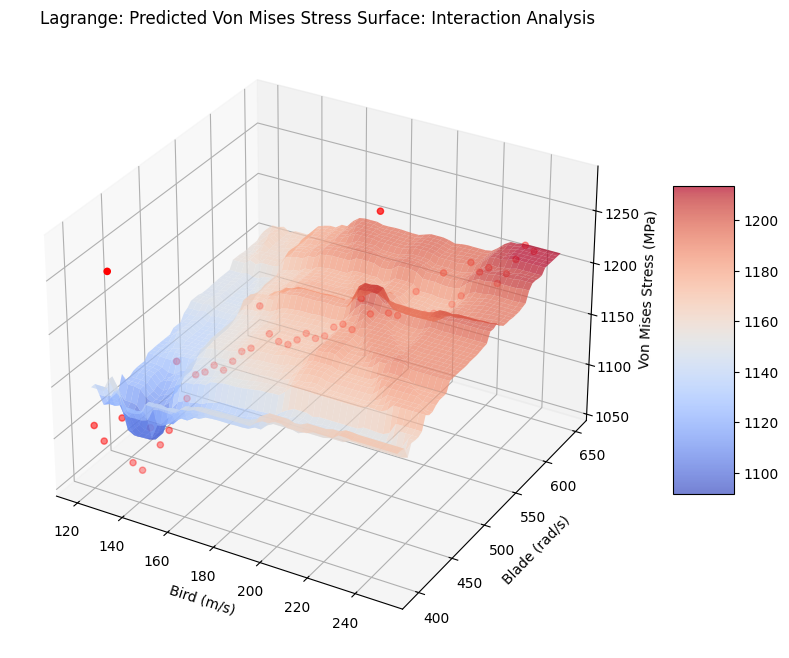

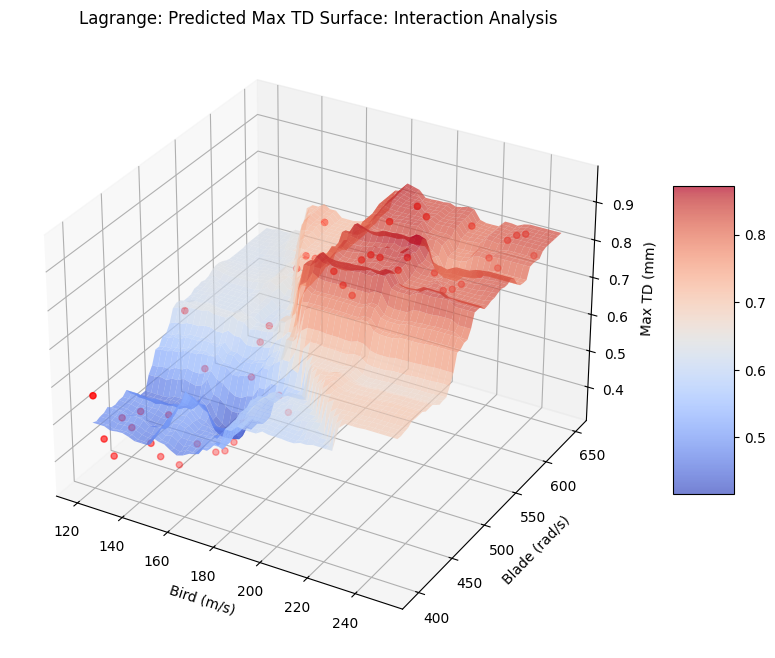

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 1. Create a grid of values for Bird and Blade speeds
# Using the range observed in your 3D scatter plot (approx 120-250 and 400-650)
bird_range = np.linspace(120, 250, 50)
blade_range = np.linspace(400, 650, 50)
BIRD, BLADE = np.meshgrid(bird_range, blade_range)

# 2. Prepare the grid for prediction
# We must create the same 'BirdxBlade' feature used in your winning model
grid_df = pd.DataFrame({
    'Bird(m/s)': BIRD.ravel(),
    'Blade(rad/s)': BLADE.ravel(),
    'BirdxBlade': (BIRD * BLADE).ravel(),
    'Bird^2': (BIRD ** 2).ravel(),
    'Blade^2': (BLADE ** 2).ravel()
})
grid_df['BirdxBlade'] = grid_df['Bird(m/s)'] * grid_df['Blade(rad/s)']
grid_df['Bird^2'] = grid_df['Bird(m/s)'] ** 2
grid_df['Blade^2'] = grid_df['Blade(rad/s)'] ** 2

# 3. Predict Stress across the entire grid
# Using your rf_models 
Z_pred_all = np.column_stack([
    rf_models[target].predict(grid_df) for target in targets
])

# using Total_Energy_kJ
Z_pred_total = Z_pred_all[:, 2].reshape(BIRD.shape)

# 4. Plot the 3D Surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the predicted surface
surf = ax.plot_surface(BIRD, BLADE, Z_pred_total, cmap=cm.coolwarm, alpha=0.5, antialiased=True)

# Add your actual data points (red dots) to see how well they align
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Total_Energy'] / 1e6, c='red', marker='o', label='Actual Data')
ax.set_xlabel('Bird (m/s)')
ax.set_ylabel('Blade (rad/s)')
ax.set_zlabel('Total Energy (kJ)')
ax.set_title('Lagrange: Predicted Total Energy Surface: Interaction Analysis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# using Von_Mises_Stress_MPa
Z_pred_stress = Z_pred_all[:, 1].reshape(BIRD.shape)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the predicted surface
surf = ax.plot_surface(BIRD, BLADE, Z_pred_stress, cmap=cm.coolwarm, alpha=0.7, antialiased=True)
# Add your actual data points (red dots) to see how well they align
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Von_Mises_Stress(pascal)'] / 1e6, c='red', marker='o', label='Actual Data')
ax.set_xlabel('Bird (m/s)')
ax.set_ylabel('Blade (rad/s)')
ax.set_zlabel('Von Mises Stress (MPa)')
ax.set_title('Lagrange: Predicted Von Mises Stress Surface: Interaction Analysis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# using Max_TD_mm
Z_pred_td = Z_pred_all[:, 0].reshape(BIRD.shape)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the predicted surface
surf = ax.plot_surface(BIRD, BLADE, Z_pred_td, cmap=cm.coolwarm, alpha=0.7, antialiased=True)
# Add your actual data points (red dots) to see how well they align
ax.scatter(data_raw['Bird(m/s)'], data_raw['Blade(rad/s)'], data_raw['Max_TD(mm)'], c='red', marker='o', label='Actual Data')
ax.set_xlabel('Bird (m/s)')
ax.set_ylabel('Blade (rad/s)')
ax.set_zlabel('Max TD (mm)')
ax.set_title('Lagrange: Predicted Max TD Surface: Interaction Analysis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



# Max_TD(mm)

In [ ]:
print(f"Actual Max_TD(mm) Max: {data_raw['Max_TD(mm)'].max()}")
print(f"Predicted Max_TD(mm) Max: {Z_pred_td.max()}")

Actual Max_TD(mm) Max: 0.95
Predicted Max_TD(mm) Max: 0.87259


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=bird_range,
        y=blade_range,
        z=Z_pred_td,
        colorscale='Viridis',
        opacity=0.7,
        name='Predicted Surface'
    ),
    go.Scatter3d(
        x=data_raw['Bird(m/s)'],
        y=data_raw['Blade(rad/s)'],
        z=data_raw['Max_TD(mm)'],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Actual Data'
    )
])

fig.update_layout(
    title='Lagrange: Predicted Max TD Surface: Interaction Analysis',
    # 1. Increase the actual window size
    width=1200, 
    height=800,
    # 2. Tighten margins to use all available space
    margin=dict(l=0, r=0, b=0, t=50), 
    scene=dict(
        xaxis_title='Bird (m/s)',
        yaxis_title='Blade (rad/s)',
        zaxis_title='Max TD (mm)',
        # 3. Control the "box" shape of the 3D plot
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

# Von_Mises_Stress(pascal)

In [ ]:
print(f"Actual Von_Mises_Stress(pascal) Max: {data_raw['Von_Mises_Stress(pascal)'].max()}")
print(f"Predicted Von_Mises_Stress(pascal) Max: {Z_pred_stress.max()}")  # Convert back to pascal

Actual Von_Mises_Stress(pascal) Max: 1276456097
Predicted Von_Mises_Stress(pascal) Max: 1212.8967632953331


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=bird_range,
        y=blade_range,
        z=Z_pred_stress * 1e6,  # Convert back to pascal
        colorscale='Viridis',
        opacity=0.7,
        name='Predicted Surface'
    ),
    go.Scatter3d(
        x=data_raw['Bird(m/s)'],
        y=data_raw['Blade(rad/s)'],
        z=data_raw['Von_Mises_Stress(pascal)'],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Actual Data'
    )
])

fig.update_layout(
    title='Lagrange: Predicted Von_Mises_Stress(pascal) Surface: Interaction Analysis',
    # 1. Increase the actual window size
    width=1200, 
    height=800,
    # 2. Tighten margins to use all available space
    margin=dict(l=0, r=0, b=0, t=50), 
    scene=dict(
        xaxis_title='Bird (m/s)',
        yaxis_title='Blade (rad/s)',
        zaxis_title='Von_Mises_Stress(pascal)',
        # 3. Control the "box" shape of the 3D plot
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

# Toal Energy 

In [ ]:
print(f"Actual Von_Mises_Stress(pascal) Max: {data_raw['Total_Energy'].max()}")
print(f"Predicted Von_Mises_Stress(pascal) Max: {Z_pred_total.max() * 1000}")  # Convert back to pascal

Actual Von_Mises_Stress(pascal) Max: 2731651.48
Predicted Von_Mises_Stress(pascal) Max: 2610084.4112028573


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=bird_range,
        y=blade_range,
        z=Z_pred_total * 1000,  # Convert back to pascal
        colorscale='Viridis',
        opacity=0.7,
        name='Predicted Surface'
    ),
    go.Scatter3d(
        x=data_raw['Bird(m/s)'],
        y=data_raw['Blade(rad/s)'],
        z=data_raw['Total_Energy'],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Actual Data'
    )
])

fig.update_layout(
    title='Lagrange: Predicted Total_Energy(kJ) Surface: Interaction Analysis',
    # 1. Increase the actual window size
    width=1200, 
    height=800,
    # 2. Tighten margins to use all available space
    margin=dict(l=0, r=0, b=0, t=50), 
    scene=dict(
        xaxis_title='Bird (m/s)',
        yaxis_title='Blade (rad/s)',
        zaxis_title='Total_Energy(kJ)',
        # 3. Control the "box" shape of the 3D plot
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

# SVR with RBF 

In [ ]:

# SVR only supports single-output regression, so we fit one model per target
targets = y.columns
results = {}

for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train SVR model
    model = SVR(kernel='rbf', C=160, gamma= 0.1, epsilon=0.1)
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_svr = mean_squared_error(y_test_target, y_pred)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test_target, y_pred)

    print(f"\nResults for {target}:")
    print(f'Mean Squared Error: {mse_svr:.4f}')
    print(f'RMSE: {rmse_svr:.4f}')
    print(f'R² Score: {r2_svr:.4f}')

    # K-Fold cross-validation for SVR
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_svr = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        svr_model_kf = SVR(kernel='rbf', C=160, gamma=1, epsilon=0.1)
        svr_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_svr = svr_model_kf.predict(X_test_kf_scaled)

        mse_kf_svr = mean_squared_error(y_test_kf, y_pred_kf_svr)
        rmse_kf_svr = np.sqrt(mse_kf_svr)
        rmse_list_svr.append(rmse_kf_svr)
        r2_kf_svr = r2_score(y_test_kf, y_pred_kf_svr)

    average_rmse_svr = np.mean(rmse_list_svr)
    print(f"Average MSE from K-Fold CV (SVR): {average_rmse_svr:.4f}")
    print(f"MSEs from each fold (SVR): {rmse_list_svr}")
    print(f"K fold R²   : {r2_kf_svr:.4f}")
    print(f"K fold MSE  : {mse_kf_svr:.4f}")

# Feature importance is not directly available for SVR models


Results for Max_TD_mm:
Mean Squared Error: 0.0335
RMSE: 0.1830
R² Score: -0.3710
Average MSE from K-Fold CV (SVR): 0.1127
MSEs from each fold (SVR): [np.float64(0.10985617733210185), np.float64(0.07781884585700548), np.float64(0.13511649463624148), np.float64(0.16187166535619227), np.float64(0.078734713009413)]
K fold R²   : 0.7716
K fold MSE  : 0.0062

Results for Von_Mises_Stress_MPa:
Mean Squared Error: 1890.5737
RMSE: 43.4807
R² Score: -0.5153
Average MSE from K-Fold CV (SVR): 29.3434
MSEs from each fold (SVR): [np.float64(31.17638610258442), np.float64(16.763097662268994), np.float64(22.851149491106792), np.float64(55.942659912377074), np.float64(19.983854168641738)]
K fold R²   : 0.7544
K fold MSE  : 399.3544

Results for Total_Energy_kJ:
Mean Squared Error: 60426.1774
RMSE: 245.8174
R² Score: 0.6821
Average MSE from K-Fold CV (SVR): 89.4211
MSEs from each fold (SVR): [np.float64(124.84251391642132), np.float64(40.586969126546094), np.float64(79.52389654722069), np.float64(83.36

# Polynomial Regression

In [ ]:
# polynomial regression only supports single-output regression, so we fit one model per target
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Evaluate model
    mse_poly = mean_squared_error(y_test_target, y_pred)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_target, y_pred)

    print(f"\nPolynomial Regression Results for {target}:")
    print(f'Mean Squared Error: {mse_poly:.4f}')
    print(f'RMSE: {rmse_poly:.4f}')
    print(f'R² Score: {r2_poly:.4f}')
    # K-Fold cross-validation for Polynomial Regression
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_poly = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        # Create polynomial features
        poly_kf = PolynomialFeatures(degree=2)
        X_train_kf_poly = poly_kf.fit_transform(X_train_kf_scaled)
        X_test_kf_poly = poly_kf.transform(X_test_kf_scaled)

        poly_model_kf = LinearRegression()
        poly_model_kf.fit(X_train_kf_poly, y_train_kf)
        y_pred_kf_poly = poly_model_kf.predict(X_test_kf_poly)

        mse_kf_poly = mean_squared_error(y_test_kf, y_pred_kf_poly)
        rmse_kf_poly = np.sqrt(mse_kf_poly)
        rmse_list_poly.append(rmse_kf_poly)
    average_rmse_poly = np.mean(rmse_list_poly)
    r2_kf_poly = r2_score(y_test_kf, y_pred_kf_poly)
    print(f"Average MSE from K-Fold CV (Polynomial Regression): {average_rmse_poly:.4f}")
    print(f"MSEs from each fold (Polynomial Regression): {rmse_list_poly}")
    print(f"K fold R²   : {r2_kf_poly:.4f}")
    print(f"K fold MSE  : {mse_kf_poly:.4f}")

    


Polynomial Regression Results for Max_TD_mm:
Mean Squared Error: 0.0076
RMSE: 0.0872
R² Score: 0.7693
Average MSE from K-Fold CV (Polynomial Regression): 0.1019
MSEs from each fold (Polynomial Regression): [np.float64(0.08188424967436762), np.float64(0.08794910626267316), np.float64(0.07562716719024408), np.float64(0.1614229837039113), np.float64(0.1027427274076151)]
K fold R²   : 0.6110
K fold MSE  : 0.0106

Polynomial Regression Results for Von_Mises_Stress_MPa:
Mean Squared Error: 1255.2468
RMSE: 35.4295
R² Score: -0.7698
Average MSE from K-Fold CV (Polynomial Regression): 31.6683
MSEs from each fold (Polynomial Regression): [np.float64(30.341614278497577), np.float64(24.035670118037583), np.float64(28.494315960578017), np.float64(53.5225191702816), np.float64(21.94723676604146)]
K fold R²   : 0.7038
K fold MSE  : 481.6812

Polynomial Regression Results for Total_Energy_kJ:
Mean Squared Error: 152692.5553
RMSE: 390.7589
R² Score: 0.5087
Average MSE from K-Fold CV (Polynomial Regres

# XG Boost

In [ ]:
# XGBoost only supports single-output regression, so we fit one model per target
import xgboost as xgb
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train XGBoost model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_xgb = mean_squared_error(y_test_target, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test_target, y_pred)

    print(f"\nXGBoost Results for {target}:")
    print(f'Mean Squared Error: {mse_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'R² Score: {r2_xgb:.4f}')
    # K-Fold cross-validation for XGBoost
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_xgb = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        xgb_model_kf = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        xgb_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_xgb = xgb_model_kf.predict(X_test_kf_scaled)

        mse_kf_xgb = mean_squared_error(y_test_kf, y_pred_kf_xgb)
        rmse_kf_xgb = np.sqrt(mse_kf_xgb)
        rmse_list_xgb.append(rmse_kf_xgb)
        r2_kf_xgb = r2_score(y_test_kf, y_pred_kf_xgb)

    average_rmse_xgb = np.mean(rmse_list_xgb)
    print(f"Average MSE from K-Fold CV (XGBoost): {average_rmse_xgb:.4f}")
    print(f"MSEs from each fold (XGBoost): {rmse_list_xgb}")
    print(f"K fold R²   : {r2_kf_xgb:.4f}")
    print(f"K fold MSE  : {mse_kf_xgb:.4f}")

# Feature importance for XGBoost
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
    print("\nXGBoost Feature Importances:")
    print(feature_importance_df_xgb)

    


XGBoost Results for Max_TD_mm:
Mean Squared Error: 0.0096
RMSE: 0.0980
R² Score: 0.7083
Average MSE from K-Fold CV (XGBoost): 0.1151
MSEs from each fold (XGBoost): [np.float64(0.09099354301934073), np.float64(0.09937737638347127), np.float64(0.08076744417272289), np.float64(0.15496543292318868), np.float64(0.14939126737550085)]
K fold R²   : 0.1776
K fold MSE  : 0.0223

XGBoost Feature Importances:
        Feature  Importance
0     Bird(m/s)         1.0
1  Blade(rad/s)         0.0
2    BirdxBlade         0.0
3        Bird^2         0.0
4       Blade^2         0.0

XGBoost Results for Von_Mises_Stress_MPa:
Mean Squared Error: 2695.3023
RMSE: 51.9163
R² Score: -2.8001
Average MSE from K-Fold CV (XGBoost): 45.1488
MSEs from each fold (XGBoost): [np.float64(32.451632252086675), np.float64(75.36135580336384), np.float64(49.42586237065043), np.float64(48.832052013836645), np.float64(19.673121574774864)]
K fold R²   : 0.7620
K fold MSE  : 387.0317

XGBoost Feature Importances:
        Featur